1. Multiconjuntos

In [1]:
def multiconjunto(elementos):
    multiconjunto = {}
    for e in elementos:
        if e not in multiconjunto:
            multiconjunto[e] = 0
        multiconjunto[e] += 1
    return multiconjunto

mc = multiconjunto([1,1,1,3,3,1,4,5,1,5])
mc

{1: 5, 3: 2, 4: 1, 5: 2}

In [2]:
def cardinalidad(multiconjunto):
    return sum([multiconjunto[k] for k in multiconjunto])

cardinalidad(mc)

10

In [3]:
def inserta(multiconjunto, elemento):
    if elemento not in multiconjunto:
        multiconjunto[elemento] = 0
    multiconjunto[elemento] += 1
    return multiconjunto

mc = inserta(mc, 9)
mc


{1: 5, 3: 2, 4: 1, 5: 2, 9: 1}

In [4]:
def elimina(multiconjunto, elemento):
    if elemento not in multiconjunto:
        return multiconjunto
    multiconjunto[elemento] -= 1
    if multiconjunto[elemento] == 0:
        del multiconjunto[elemento]
    return multiconjunto

mc = elimina(mc, 9)
mc


{1: 5, 3: 2, 4: 1, 5: 2}

In [5]:
def pertenece(multiconjunto, elemento):
    return elemento in multiconjunto

def subconjunto(multiconjunto1, multiconjunto2):
    essubconjunto = True
    for e in multiconjunto1:
        essubconjunto = essubconjunto and (e in multiconjunto2) and (multiconjunto1[e] <= multiconjunto2[e])
    return essubconjunto

def iguales(multiconjunto1, multiconjunto2):
    return subconjunto(multiconjunto1, multiconjunto2) and subconjunto(multiconjunto2, multiconjunto1)

print(pertenece(mc, 1))
print(subconjunto(multiconjunto([1,3,4]), mc))
print(iguales(multiconjunto([1,3,4]), mc))


True
True
False


In [6]:
def union(multiconjunto1, multiconjunto2):
    resultado = multiconjunto1.copy()
    for e in multiconjunto2:
        if e not in resultado:
            resultado[e] = 0
        resultado[e] += multiconjunto2[e]
    return resultado

def interseccion(multiconjunto1, multiconjunto2):
    resultado = multiconjunto([])
    for e in multiconjunto1:
        if e in multiconjunto2:
            resultado[e] = min(multiconjunto1[e], multiconjunto2[e])
    return resultado

def diferencia(multiconjunto1, multiconjunto2):
    resultado = multiconjunto1.copy()
    for e in multiconjunto2:
        if e in resultado:
            if multiconjunto2[e] >= resultado[e]:
                del resultado[e]
            else:
                resultado[e] -= multiconjunto2[e]
    return resultado

print(union(multiconjunto([1,3,4]), mc))
print(interseccion(multiconjunto([1,3,4]), mc))
print(diferencia(mc, multiconjunto([1,2,3,4])))

{1: 6, 3: 3, 4: 2, 5: 2}
{1: 1, 3: 1, 4: 1}
{1: 4, 3: 1, 5: 2}


2. Singular Value Decomposition

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_17416\969300423.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  A = misc.face(gray=True)


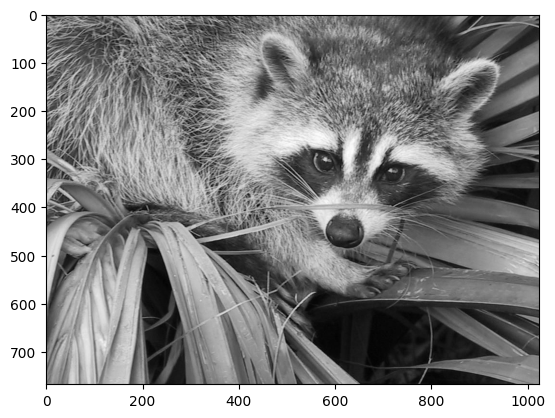

In [7]:
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [8]:
import numpy as np

def sse_score(X, X_hat):
    return np.sum((X - X_hat)**2) 

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


In [9]:
def svm(X):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    S = np.diag(s)
    return U, S, Vt

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svm(X)

In [10]:
U

array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])

In [11]:
S

array([[5.4649857 , 0.        ],
       [0.        , 0.36596619]])

In [12]:
Vt

array([[-0.57604844, -0.81741556],
       [ 0.81741556, -0.57604844]])

In [13]:
def reconstruction(U, S, Vt):
    return U.dot(S.dot(Vt))

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

In [14]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_17416\2898165159.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  A = misc.face(gray=True)


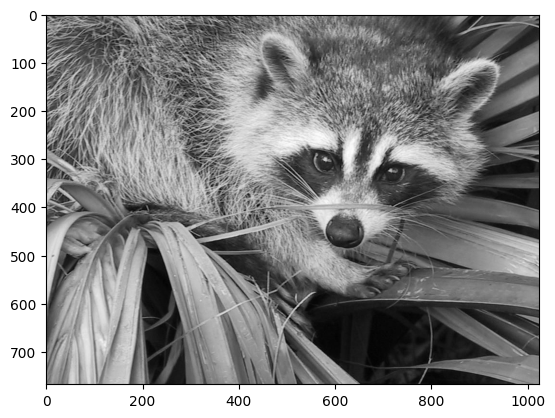

In [15]:
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [16]:
def image_compression(A, n_components):
    U, S, Vt = svm(A)
    
    A_hat = reconstruction(U[0:U.shape[0], 0:n_components], 
                           S[0:n_components,0:n_components], 
                           Vt[0:n_components, 0:Vt.shape[1]])
            
    sse = np.sum((A - A_hat)**2) 
    comp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])
    
    return A_hat, sse, comp_ratio

A_hat, sse, comp_ratio = image_compression(A, n_components=50)

Reconstruction Error: 195489946.2101702
Ratio de compresión: 0.11399586995442708


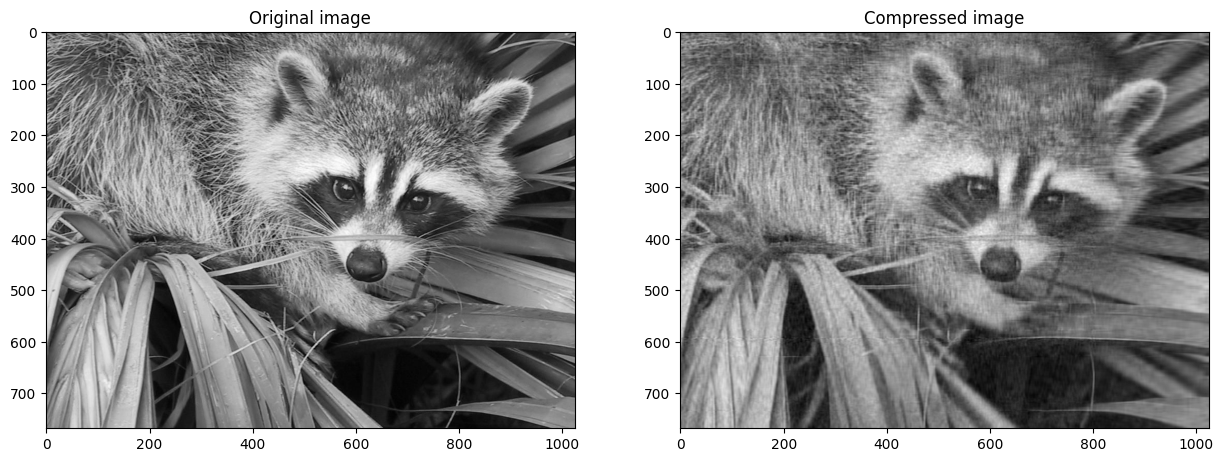

In [17]:
print(f"Reconstruction Error: {sse}")
print(f"Ratio de compresión: {comp_ratio}")

plt.figure(figsize=(15,10)) #figsize=(15,10)
plt.subplot(121)
plt.imshow(A, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(A_hat, cmap=plt.cm.gray)
plt.title('Compressed image')
plt.show()

3. Linear Regression - Least Squares

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
tr_path = './train.csv'
data = pd.read_csv(tr_path)

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
len_columns = len(data.columns)
print('Len columns: ', len_columns)
ans1 = len_columns

Len columns:  81


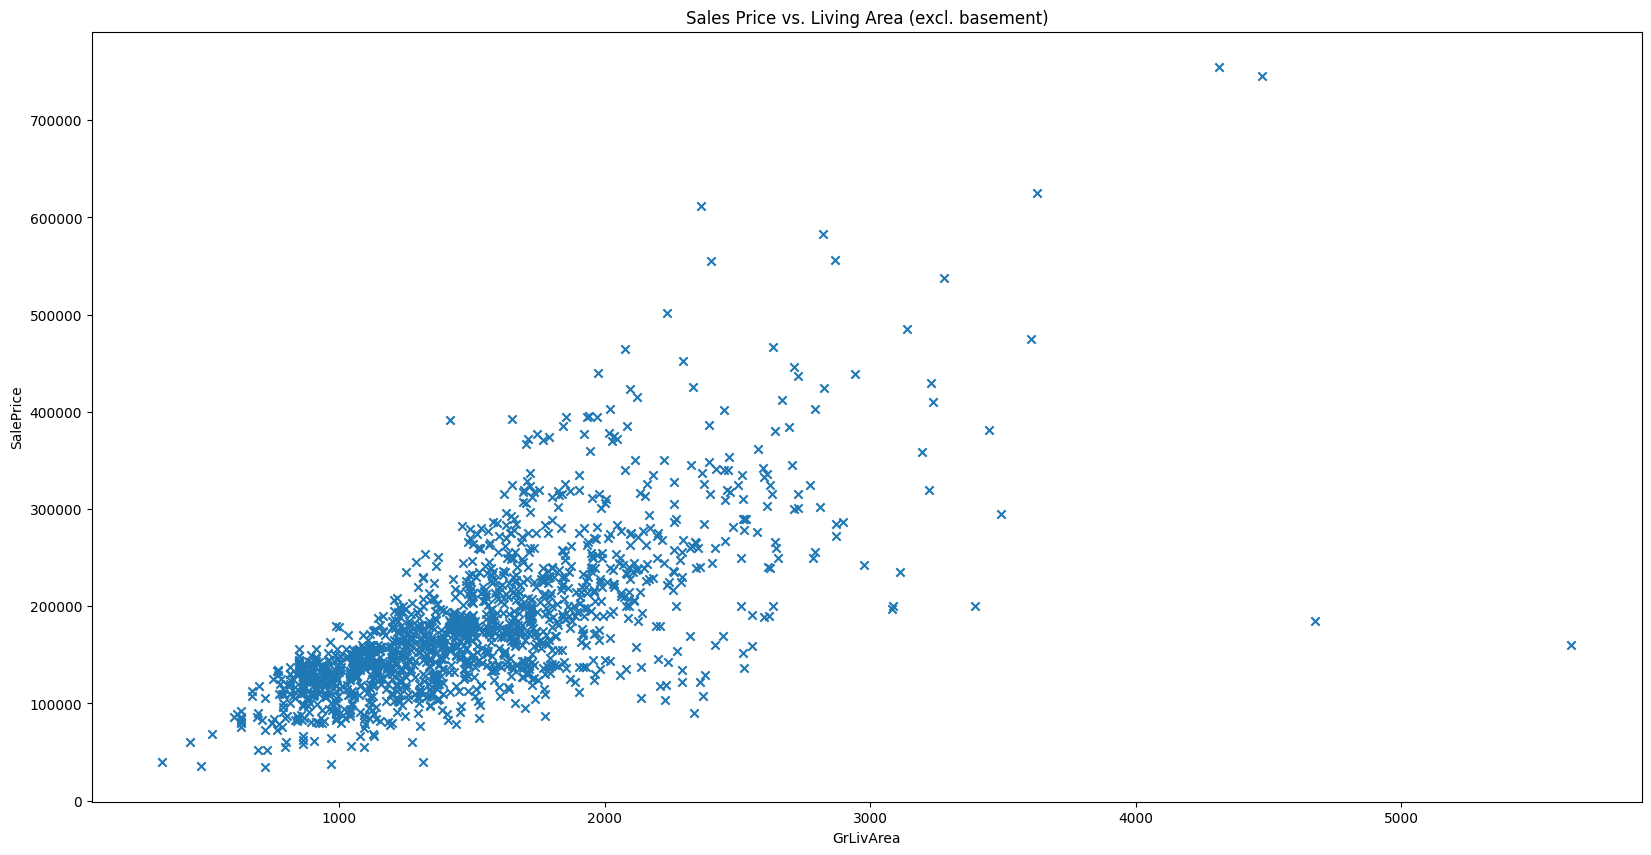

In [9]:
Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

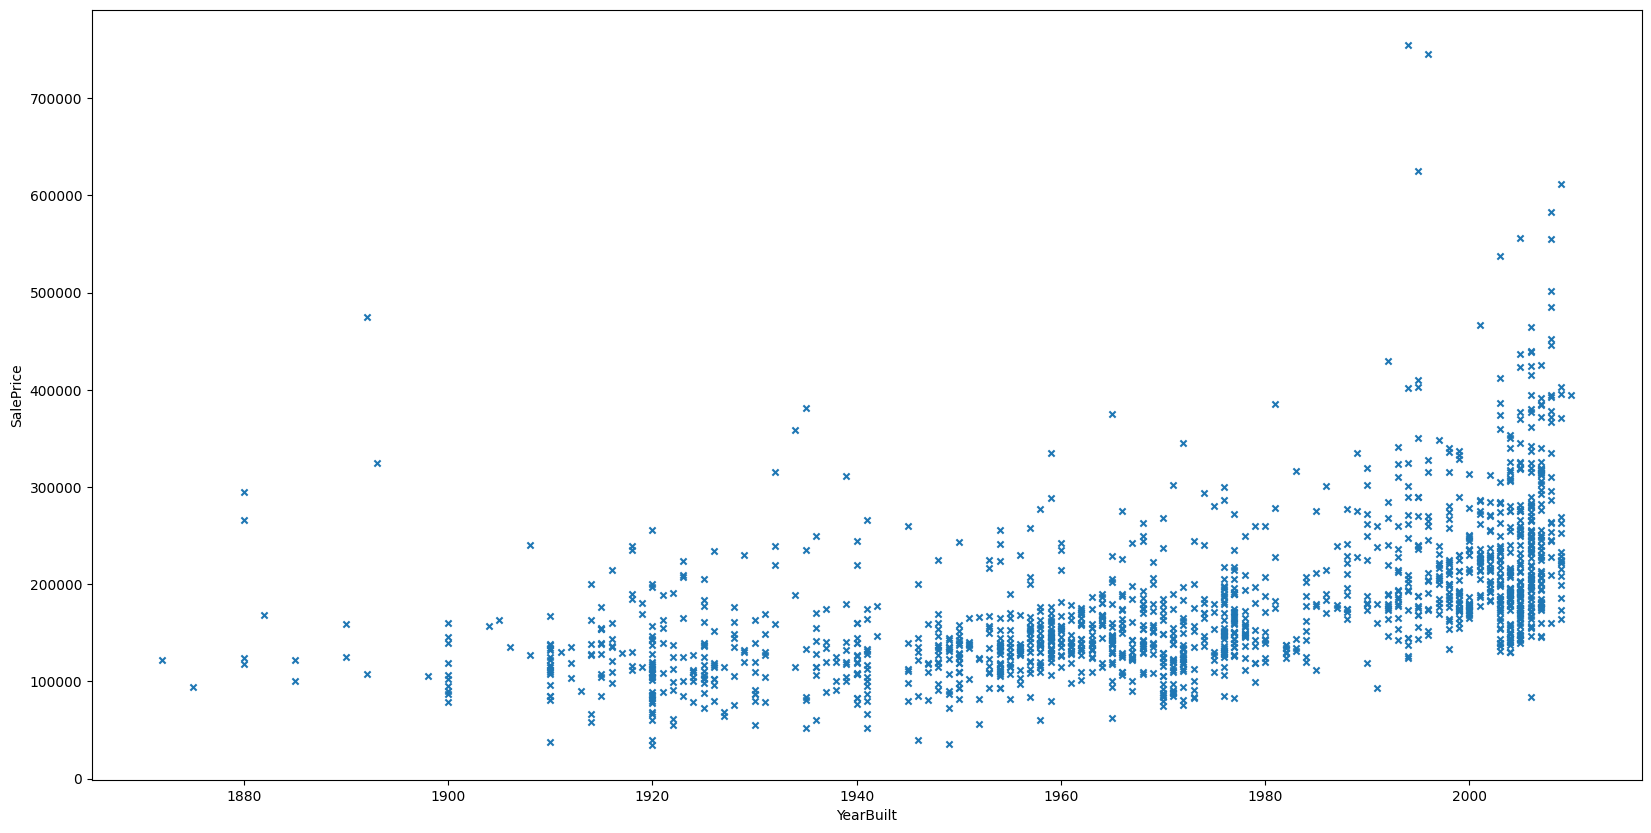

In [10]:
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

In [11]:
def inverse_of_matrix(mat):
    matrix_inverse = np.linalg.inv(mat)
    return matrix_inverse

sample_matrix = [[1, 2], [3, 4]]
the_inverse = inverse_of_matrix(sample_matrix)  
the_inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Leer Datos

In [14]:
import pandas as pd

def read_to_df(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

dataframe = read_to_df(tr_path)

Subset del dataframe por columnas

In [15]:
def select_columns(data_frame, column_names):
    if len(column_names) != 0: 
        df_columns = data_frame[column_names]
        return df_columns
    else:
        print('No columns detected, please, insert at least a column')
        return 
    
data = read_to_df(tr_path)
selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
sub_df = select_columns(data, selected_columns)

Subset del dataframe por valores

In [16]:
def column_cutoff(data_frame, cutoffs):
    for i in range(len(cutoffs)):
        column = cutoffs[i][0]
        min_value = cutoffs[i][1]
        max_value = cutoffs[i][2]
        df_cutoff = data_frame[(data_frame[column] >= min_value) & (data_frame[column] <= max_value)]
        data_frame = df_cutoff
    return df_cutoff

data_frame = read_to_df(tr_path)
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
selected_data = column_cutoff(data_frame, cutoffs)

selected_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Mínimos Cuadrados / Least Squares

In [17]:
import numpy as np


def least_squares_weights(input_x, target_y):
    x_shape = input_x.shape
    y_shape = target_y.shape
    
    if x_shape[0] < x_shape[1]:
        input_x = np.transpose(input_x)
    if y_shape[0] < y_shape[1]:
        target_y = np.transpose(target_y)

    n = input_x.shape[0]
    ones_array = np.ones((n, 1))

    print(input_x)
    print('-------------------------')
    input_X = np.concatenate((ones_array, input_x), axis=1)
    print(input_X)
    print('------------------------')
    print(np.dot(input_X.T, input_X))
    print('-------------------------')
    w = np.dot(np.linalg.inv(np.dot(input_X.T, input_X)), np.dot(input_X.T, target_y))
    return w

    
import numpy as np
training_y = np.array([[208500, 181500, 223500, 
                        140000, 250000, 143000, 
                        307000, 200000, 129900, 
                        118000]])
training_x = np.array([[1710, 1262, 1786, 
                        1717, 2198, 1362, 
                        1694, 2090, 1774, 
                        1077], 
                       [2003, 1976, 2001, 
                        1915, 2000, 1993, 
                        2004, 1973, 1931, 
                        1939]])
weights = least_squares_weights(training_x, training_y)

print(weights) 

print(weights[1][0])

[[1710 2003]
 [1262 1976]
 [1786 2001]
 [1717 1915]
 [2198 2000]
 [1362 1993]
 [1694 2004]
 [2090 1973]
 [1774 1931]
 [1077 1939]]
-------------------------
[[1.000e+00 1.710e+03 2.003e+03]
 [1.000e+00 1.262e+03 1.976e+03]
 [1.000e+00 1.786e+03 2.001e+03]
 [1.000e+00 1.717e+03 1.915e+03]
 [1.000e+00 2.198e+03 2.000e+03]
 [1.000e+00 1.362e+03 1.993e+03]
 [1.000e+00 1.694e+03 2.004e+03]
 [1.000e+00 2.090e+03 1.973e+03]
 [1.000e+00 1.774e+03 1.931e+03]
 [1.000e+00 1.077e+03 1.939e+03]]
------------------------
[[1.0000000e+01 1.6670000e+04 1.9735000e+04]
 [1.6670000e+04 2.8885618e+07 3.2923392e+07]
 [1.9735000e+04 3.2923392e+07 3.8957087e+07]]
-------------------------
[[-2.29223802e+06]
 [ 5.92536529e+01]
 [ 1.20780450e+03]]
59.25365290008935


Testeo datos reales

In [19]:
test_path = './train.csv'
df = read_to_df(test_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[1710]
 [1262]
 [1786]
 ...
 [2340]
 [1078]
 [1256]]
-------------------------
[[1.000e+00 1.710e+03]
 [1.000e+00 1.262e+03]
 [1.000e+00 1.786e+03]
 ...
 [1.000e+00 2.340e+03]
 [1.000e+00 1.078e+03]
 [1.000e+00 1.256e+03]]
------------------------
[[1.45100000e+03 2.18964800e+06]
 [2.18964800e+06 3.66006182e+09]]
-------------------------
[[13454.06670576]
 [  110.78992341]]


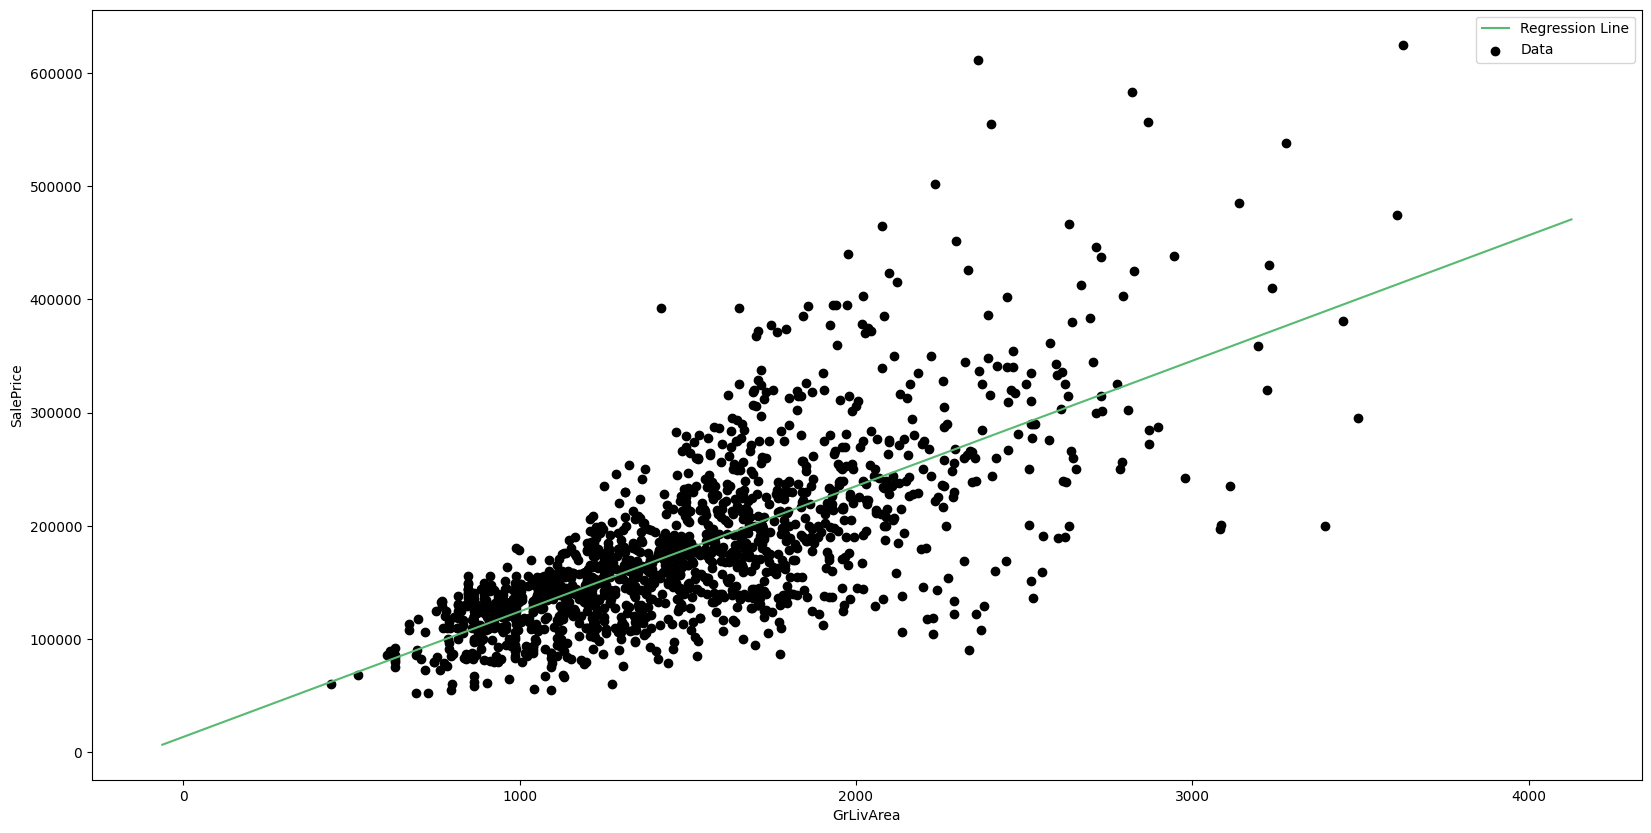

In [20]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

reg_x = np.linspace(min_X, max_X, 1000)

reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

Implementación con sklearn

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)


Intercept: 13454.066705758683
Coefficient: [110.78992341]


4 Regresión Lineal - Descenso del Gradiente

In [23]:
import pandas as pd
import numpy as np

data = pd.read_csv('./train.csv')

newData = data[['GrLivArea','SalePrice']]
print(newData.head())

x = newData['GrLivArea']
y = newData['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

print("Shape of X: ", x.shape)
print("Shape of y:", y.shape)

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000
Shape of X:  (1460, 2)
Shape of y: (1460,)


Descendiente

In [24]:
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        
        # TODO:
        loss = 1/2*np.dot(error.T, error)
        past_loss.append(loss)
        
        GradRss = np.dot(x.T, error)

        # TODO:
        w -= eta*GradRss
        past_w.append(w)
        
    return past_w, past_loss

import numpy as np

eta = 0.01 

iterations = 2000

np.random.seed(123)
w0 = np.random.rand(2)

training_y = np.array([208500, 181500, 223500, 
                        140000, 250000])
training_x = np.array([[ 1.        ,  0.37020659],
                       [ 1.        , -0.48234664],
                       [ 1.        ,  0.51483616],
                       [ 1.        ,  0.38352774],
                       [ 1.        ,  1.29888065]])

weights, loss = gradient_descent(training_x, training_y, w0, iterations, eta)

print(weights[-1])

[183845.82320222  40415.66453324]


Convergencia del gradiente descendente

In [25]:
import numpy as np

eta = 0.001 

iterations = 1000

np.random.seed(123)
w0 = np.random.rand(2)

weights, loss = gradient_descent(x, y, w0, iterations, eta)

print(weights[-1])

[180921.19589041  56294.90210563]


In [26]:
type(x)

numpy.ndarray

MovieWriter imagemagick unavailable; using Pillow instead.



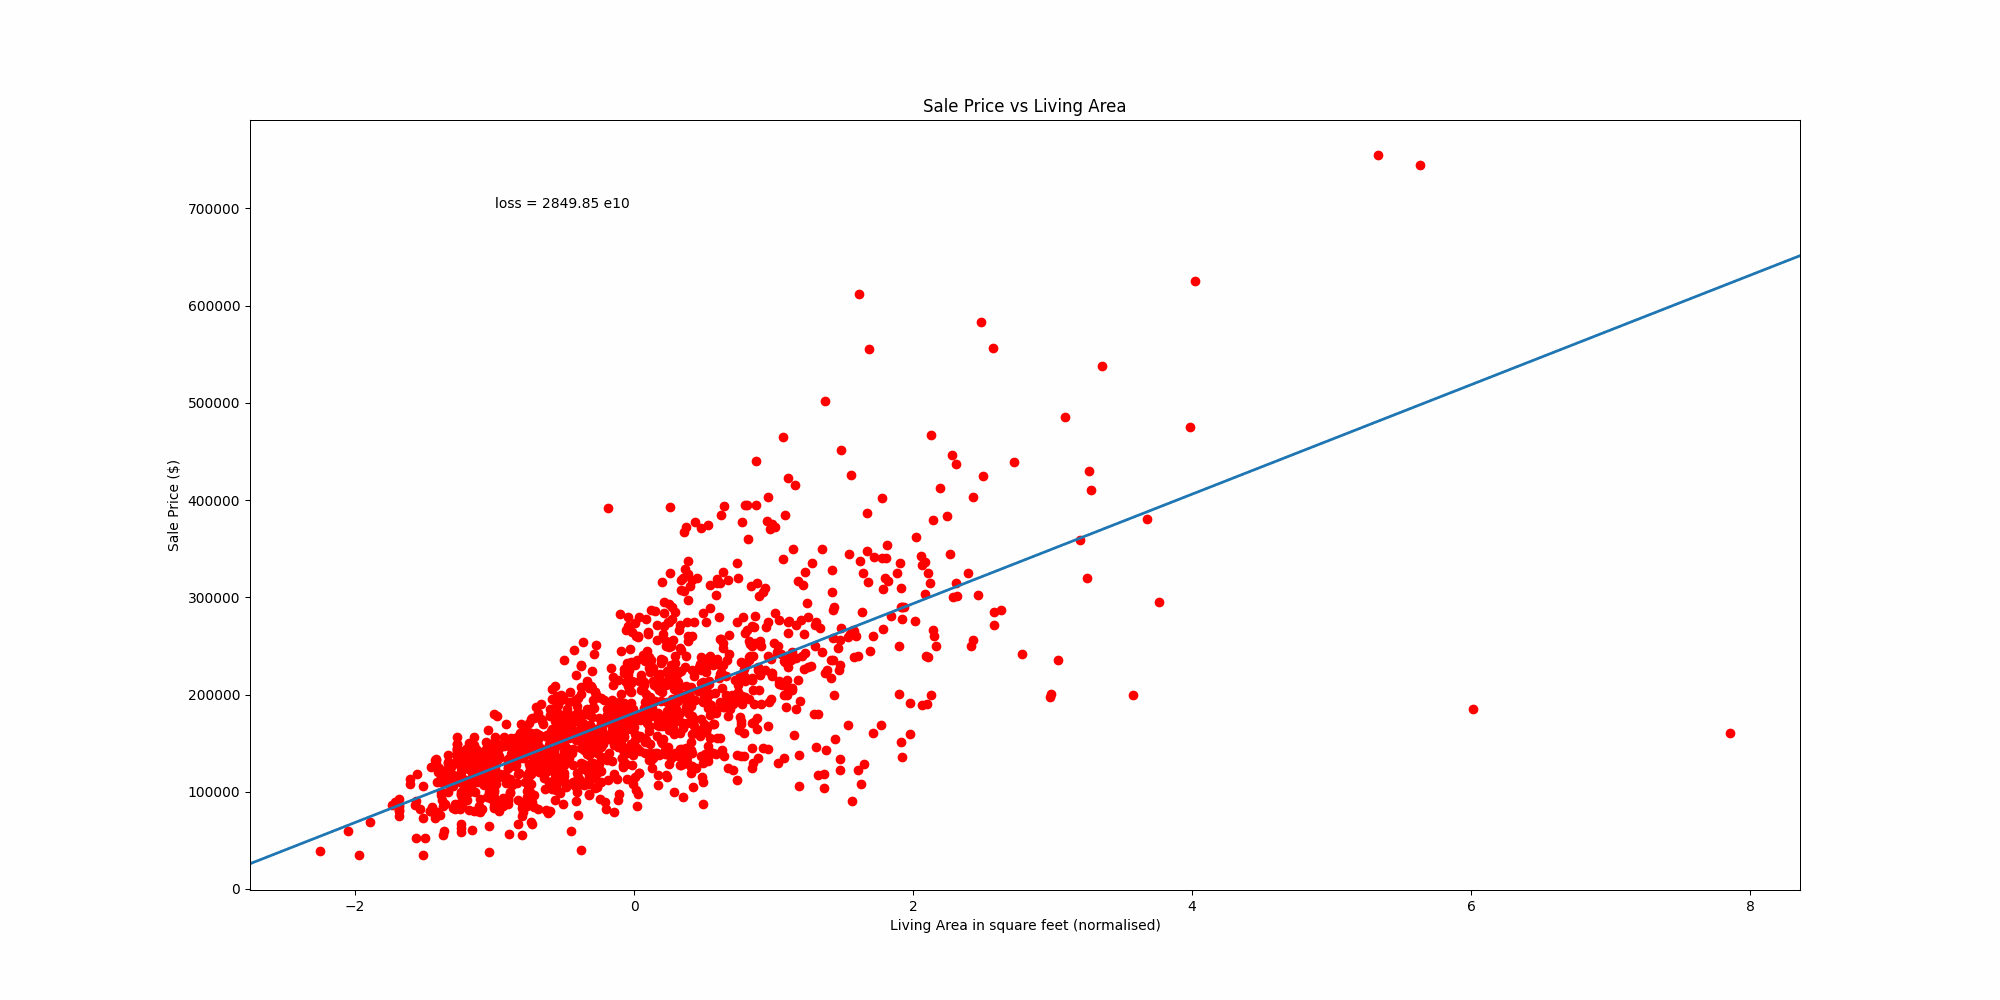

In [27]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = weights[i][1]*x + weights[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))